Do it! 데이터 분석을 위한 판다스 입문 p.81~119

## 4 그래프 그리기

### 4-1 데이터 시각화가 필요한 이유

앤스콤 4분할 그래프 : 데이터 분석 시 수치에만 의존하면 잘못된 판단을 할 수 있음을 알려주는 예시

평균, 분산, 상관관계, 회귀선의 통계 수치가 같아도 그래프의 형태는 다를 수 있음.

In [22]:
# 앤스콤 데이터 집합 불러오기

import seaborn as sns

anscombe=sns.load_dataset('anscombe')
print(anscombe.head())
print(type(anscombe))

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33
<class 'pandas.core.frame.DataFrame'>


In [ ]:
import matplotlib.pyplot as plt

dataset_1=anscombe[anscombe['dataset']=='I']

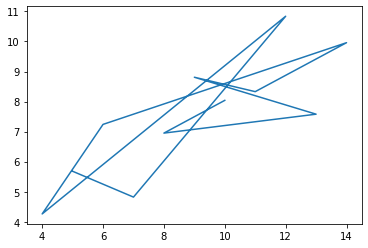

In [ ]:
# 선 그래프(기본)
plt.plot(dataset_1['x'],dataset_1['y'])

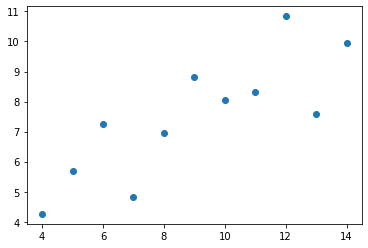

In [ ]:
# 점 그래프
plt.plot(dataset_1['x'],dataset_1['y'],'o')

matplotlib 라이브러리로 그래프 그리기

1. 전체 그래프가 위치할 기본 틀을 만든다.

2. 그래프를 그려 넣을 그래프 격자를 만든다.

3. 그런 다음 격자에 그래프를 하나씩 추가한다. 격자에 그래프가 추가되는 순서는 왼쪽에서 오른쪽 방향이다.

4. 만약 격자의 첫 번째 행이 꽉 차면 두 번째 행에 그래프를 그려 넣습니다.

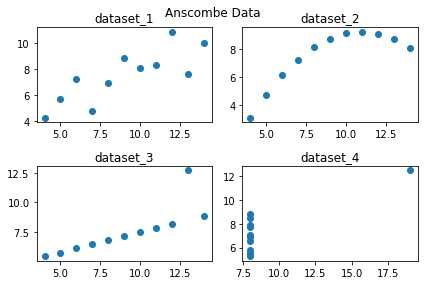

In [ ]:
# 앤스콤 데이터 집합 모두 사용해 그래프 만들기
dataset_2=anscombe[anscombe['dataset']=='II']
dataset_3=anscombe[anscombe['dataset']=='III']
dataset_4=anscombe[anscombe['dataset']=='IV']

# 그래프 격자가 위치할 기본 틀 만들기
fig=plt.figure()

# add_subplot(기본 틀의 행 크기, 열 크기) 메서드로 그래프 격자를 그림

axes1=fig.add_subplot(2,2,1)
axes2=fig.add_subplot(2,2,2)
axes3=fig.add_subplot(2,2,3)
axes4=fig.add_subplot(2,2,4)

axes1.plot(dataset_1['x'],dataset_1['y'],'o')
axes2.plot(dataset_2['x'],dataset_2['y'],'o')
axes3.plot(dataset_3['x'],dataset_3['y'],'o')
axes4.plot(dataset_4['x'],dataset_4['y'],'o')

# 그래프 격자 별 제목
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')

# 기본 틀(fig) 제목
fig.suptitle('Anscombe Data')

# 각 그래프의 이름과 숫자가 겹칠 때
fig.tight_layout()

### 4-2 matplotlib 라이브러리 자유자재로 사용하기

In [ ]:
# 기초 그래프 그리기 - 히스토그램, 산점도 그래프, 박스 그래프
tips=sns.load_dataset('tips')
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Total Bill')

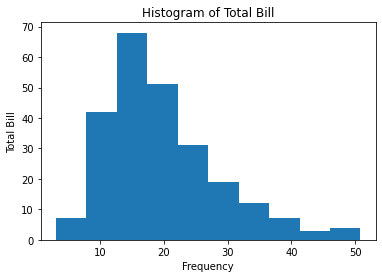

In [ ]:
# 일변량 그래프: 변수를 하나만 사용해서 그린 그래프 (ex. histogram)

fig=plt.figure()
axes1=fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'],bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

Text(0, 0.5, 'Tip')

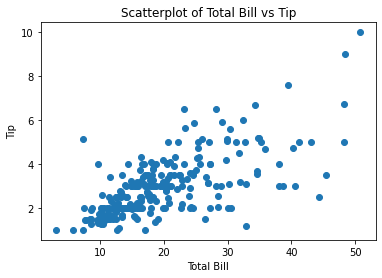

In [ ]:
# 이변량 그래프: 변수 2개를 사용해서 만든 그래프 (ex.산점도 그래프)

scatter_plot=plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'],tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Tip')

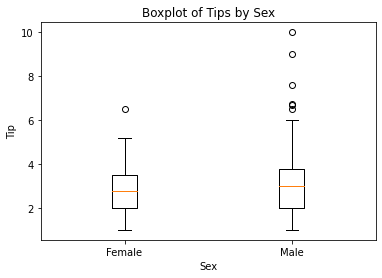

In [ ]:
# box plot
boxplot=plt.figure()
axes1=boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex']=='Female']['tip'],tips[tips['sex']=='Male']['tip']],labels=['Female','Male'])
axes1.set_title('Boxplot of Tips by Sex')
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')

### 다변량 그래프 그리기 (3개 이상의 변수 사용)

점의 크기, 색상, 투명도 등을 조절하여 나타냄

Text(0, 0.5, 'Tip')

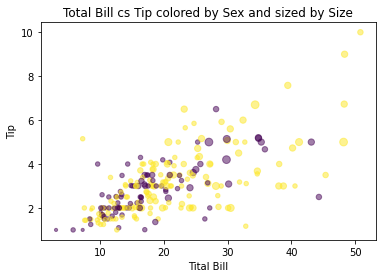

In [ ]:
def recode_sex(sex):
  if sex=='Female':
    return 0
  else:
    return 1

tips['sex_color']=tips['sex'].apply(recode_sex)

scatter_plot=plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)

axes1.scatter(x=tips['total_bill'],y=tips['tip'],s=tips['size']*10, c=tips['sex_color'],alpha=0.5)

axes1.set_title('Total Bill cs Tip colored by Sex and sized by Size')
axes1.set_xlabel('Tital Bill')
axes1.set_ylabel('Tip')

### 4-3 seaborn 라이브러리 자유자재로 사용하기

### 단변량 그래프 그리기 - 히스토그램

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

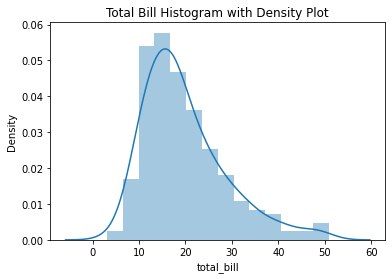

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
tips=sns.load_dataset('tips')

ax=plt.subplots()
ax=sns.distplot(tips['total_bill']) # 히스토그램과 밀집도 그래프를 함께 그림
ax.set_title('Total Bill Histogram with Density Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

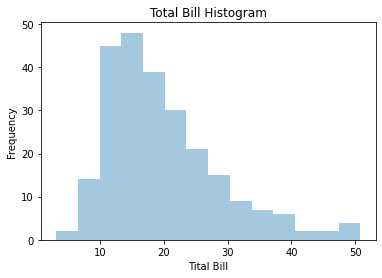

In [ ]:
ax=plt.subplots()
ax=sns.distplot(tips['total_bill'],kde=False) # 히스토그램만 나타냄 (밀집도 함수 제외)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Tital Bill')
ax.set_ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

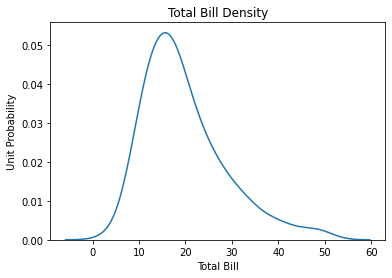

In [ ]:
ax=plt.subplots()
ax=sns.distplot(tips['total_bill'],hist=False) # 밀집도 그래프만 나타냄 (히스토그램 제외)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

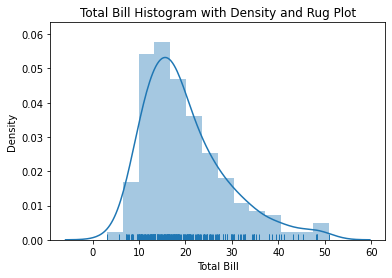

In [ ]:
ax=plt.subplots()
ax=sns.distplot(tips['total_bill'],rug=True) # 양탄자(rug)그래프까지 그림
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

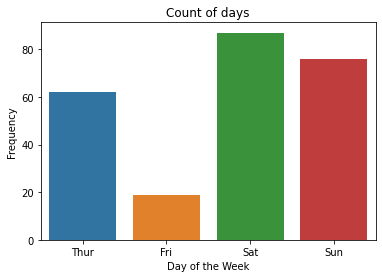

In [ ]:
# count 그래프
ax=plt.subplots()
ax=sns.countplot('day',data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

### 1. seaborn 라이브러리로 산점도 그래프 그리기

seaborn 라이브러리는 matplotlib 라이브러리보다 다양한 방법으로 산점도 그래프를 그릴 수 있음. 

regplot 메서드로 산점도 그래프와 회귀선을 함께 그림

Text(0, 0.5, 'Tip')

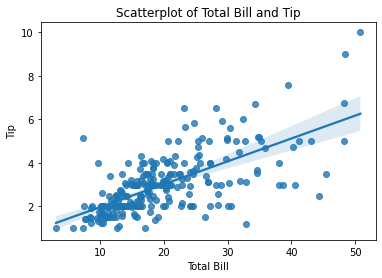

In [ ]:
ax=plt.subplots()
ax=sns.regplot(x='total_bill',y='tip',data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

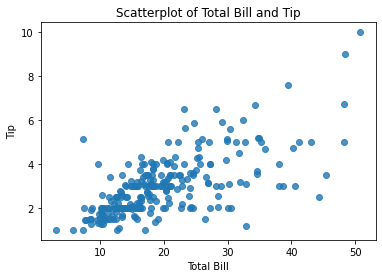

In [ ]:
ax=fig.subplots()
ax=sns.regplot(x='total_bill',y='tip',data=tips,fit_reg=False) # 회귀선 제거
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

### 2. 산점도 그래프와 히스토그램을 한 번에 그려주는 jointplot

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

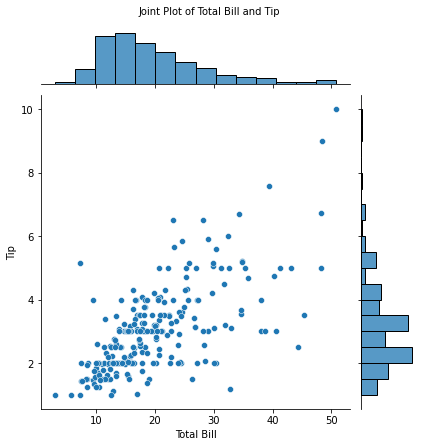

In [ ]:
joint=sns.jointplot(x='total_bill',y='tip',data=tips)
joint.set_axis_labels(xlabel='Total Bill',ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip',fontsize=10,y=1.03) # y는 title 높이 조정

### 3. 육각 그래프: 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프

- 특정 데이터의 개수가 많아지면 점점 진한 색으로 표현

- jointplot 메서드에서 kind='hex'로 지정

- 산점도 그래프는 점이 겹쳐 보일 경우 점을 구분하기 어렵기 때문에 데이터를 구분하기 쉽게 그리고 싶다면 육각 그래프(hexbin)를 사용함


Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

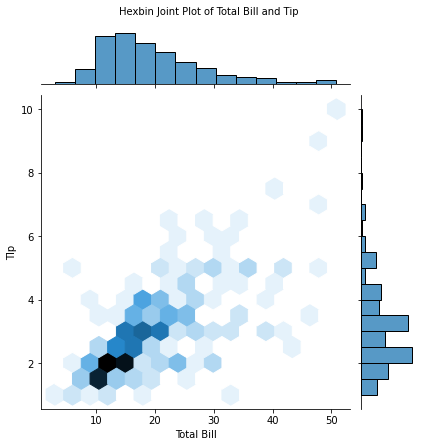

In [ ]:
hexbin=sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill',ylabel='TIp')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip',fontsize=10,y=1.03)

### 4. 이차원 밀집도 그리기 (kdeplot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

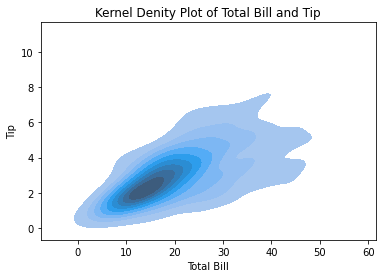

In [ ]:
ax=plt.subplots()
ax=sns.kdeplot(data=tips['total_bill'],data2=tips['tip'],shade=True) # 음영 효과
ax.set_title('Kernel Denity Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

### 5. 바 그래프 그리기

Text(0, 0.5, 'Average total bill')

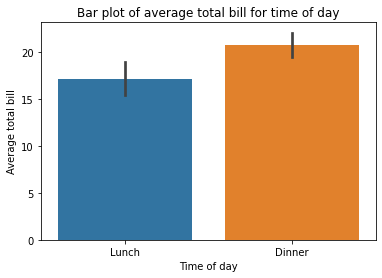

In [ ]:
ax=plt.subplots()
ax=sns.barplot(x='time',y='total_bill',data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

### 6. 박스 그래프 그리기

Text(0, 0.5, 'Total Bill')

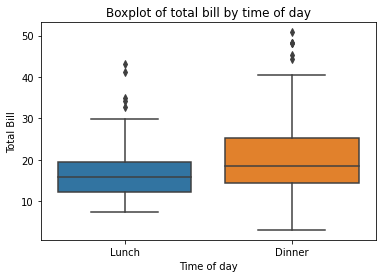

In [ ]:
ax=plt.subplots()
ax=sns.boxplot(x='time',y='total_bill',data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

### 7. 바이올린 그래프

박스 그래프는 데이터 분산이 모호하게 표현되므로 박스 그래프에 커널 밀도를 추정한 바이올린 그래프 사용

Text(0, 0.5, 'Total Bill')

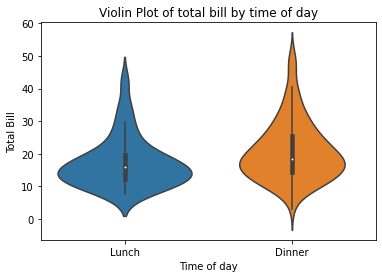

In [ ]:
ax=plt.subplots()
ax=sns.violinplot(x='time',y='total_bill',data=tips)
ax.set_title('Violin Plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

### 8. 관계 그래프 그리기

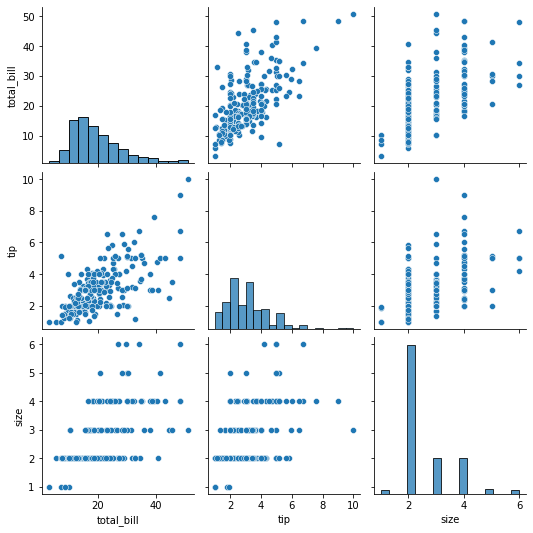

In [ ]:
fig=sns.pairplot(tips)

### 9. 관계 그래프는 중복된 그래프가 표현되므로, 해당 위치에 원하는 그래프로 교체하기

- map_upper : 대각선을 기준으로 위쪽에 그릴 그래프 지정

- map_lower : 대각선을 기준으로 아래쪽에 그릴 그래프 지정

- map_diag : 대각선을 중심으로 그래프를 그림

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

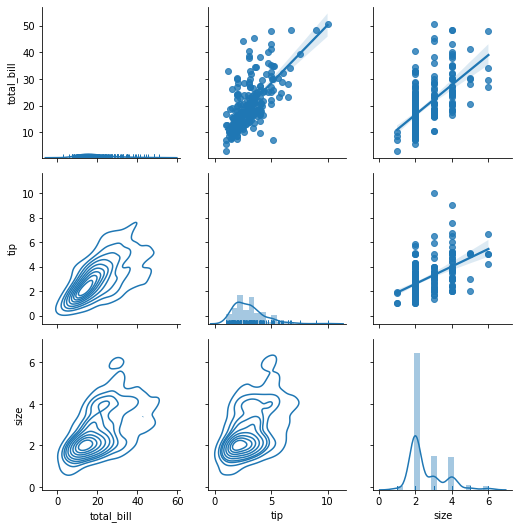

In [4]:
# 대각선을 기준으로 아래쪽에 이차원 밀집도, 위쪽에 산점도 그래프, 대각선을 중심으로 히스토그램과 밀집도를 그림

pair_grid=sns.PairGrid(tips)
pair_grid=pair_grid.map_upper(sns.regplot)
pair_grid=pair_grid.map_lower(sns.kdeplot)
pair_grid=pair_grid.map_diag(sns.distplot,rug=True)
plt.show()

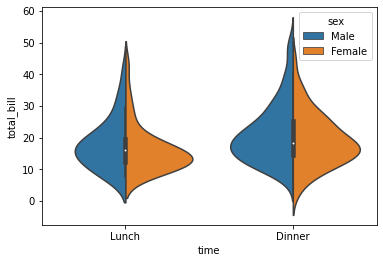

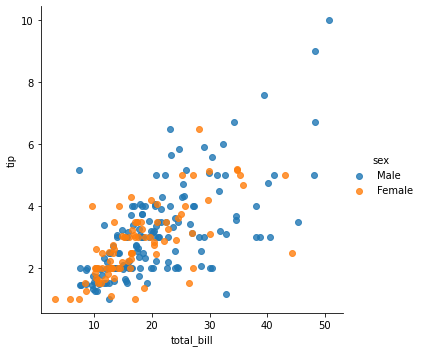

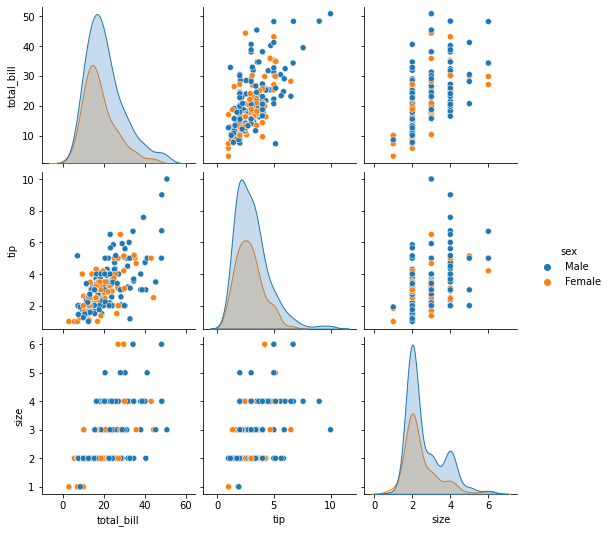

In [11]:
# seaborn 라이브러리로 다변량 그래프 그리기

# 바이올린 그래프
ax=plt.subplots()
ax=sns.violinplot(x='time',y='total_bill',hue='sex',data=tips, split=True) # hue는 색상

# 산점도
scatter=sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',fit_reg=False)

# 관계 그래프
fig=sns.pairplot(tips,hue='sex')

ValueError: ignored

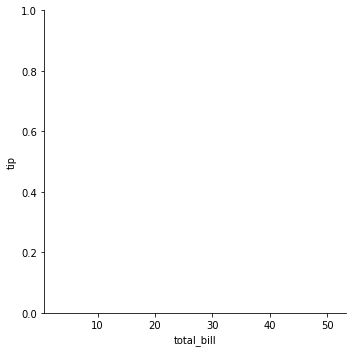

In [16]:
# 산점도 그래프의 크기와 모양 조절하기
scatter=sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',fit_reg=False,scatter_kws={'s':tips['size']*10}) # 크기 조절

ValueError: ignored

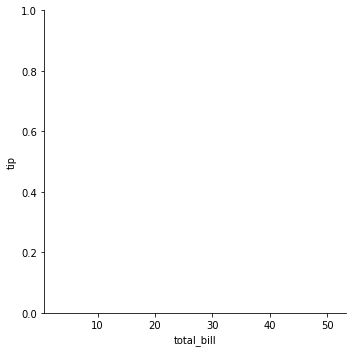

In [18]:
# 산점도 그래프의 점을 다른 기호로 표현하기

scatter = sns.lmplot(x = 'total_bill', y = 'tip',data = tips, fit_reg = False, hue = 'sex', markers = ['o','x'], scatter_kws={'s': tips['size']*10})

AttributeError: ignored

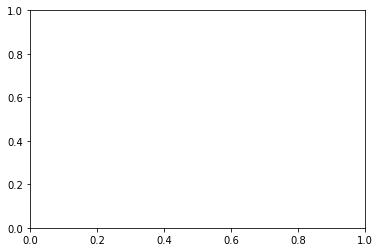

In [20]:
scatter = sns.scatterplot(x = 'total_bill', y = 'tip',data = tips, fit_reg = False, hue = 'sex', size= tips['size']*10)

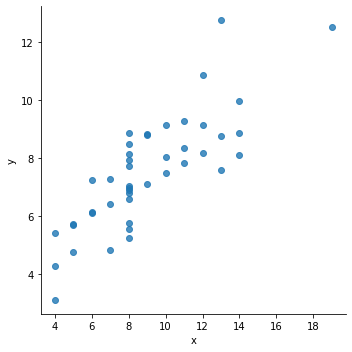

In [23]:
# lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기
anscombe_plot=sns.lmplot(x='x',y='y',data=anscombe,fit_reg=False)

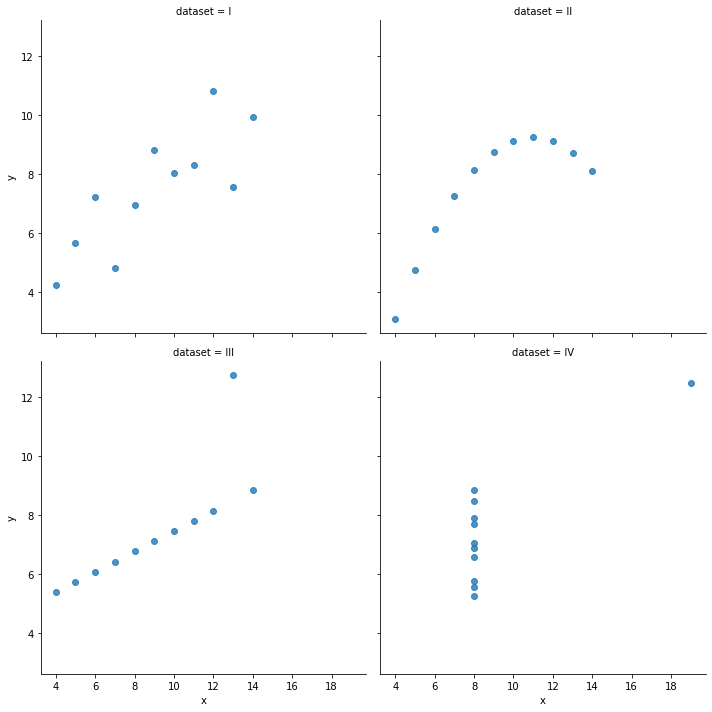

In [24]:
# 그룹별로 그래프 나누어 그리기 - col: 데이터 그룹을 구분할 열, col_wrap:그래프를 그릴 열의 최댓값
anscombe_plot=sns.lmplot(x='x',y='y',data=anscombe,fit_reg=False,col='dataset',col_wrap=2)

### FacetGrid 클래스로 그룹별 그래프 그리기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

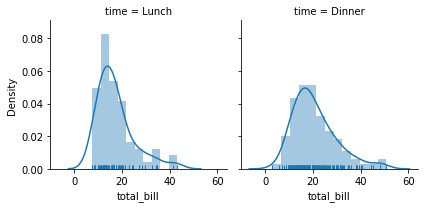

In [32]:
facet=sns.FacetGrid(tips,col='time')
facet.map(sns.distplot,'total_bill',rug=True) # rug는 양탄자 그래프 유무를 지정

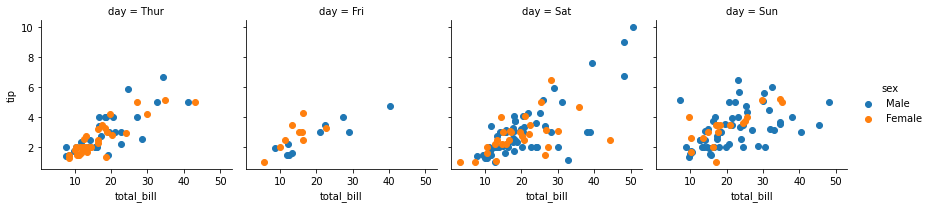

In [33]:
# day열로 그룹을 구분하여 다변량 그래프 그리기
facet=sns.FacetGrid(tips,col='day',hue='sex')
facet=facet.map(plt.scatter,'total_bill','tip')
facet=facet.add_legend()

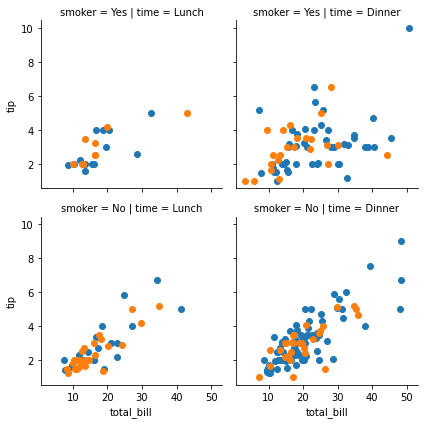

In [35]:
# time, smoker열을 사용하여 산점도 그래프 그리기
facet=sns.FacetGrid(tips,col='time',row='smoker',hue='sex')
facet.map(plt.scatter,'total_bill','tip')

## 4-4 데이터프레임과 시리즈로 그래프 그리기

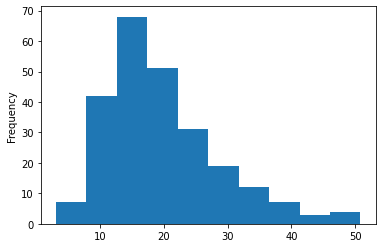

In [36]:
ax=plt.subplots()
ax=tips['total_bill'].plot.hist()

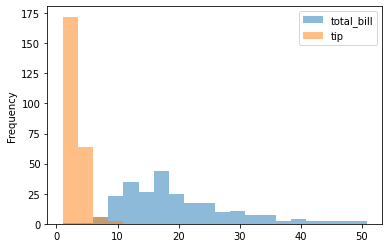

In [38]:
fig,ax=plt.subplots()
ax=tips[['total_bill','tip']].plot.hist(alpha=0.5,bins=20,ax=ax)

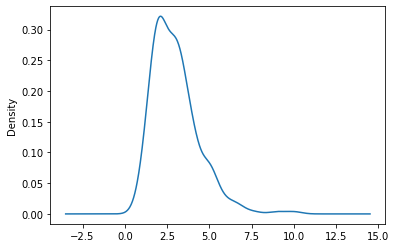

In [39]:
ax=plt.subplots()
ax=tips['tip'].plot.kde()

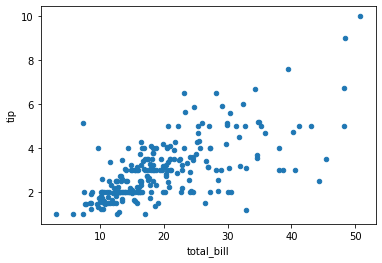

In [40]:
fig,ax=plt.subplots()
ax=tips.plot.scatter(x='total_bill',y='tip',ax=ax)

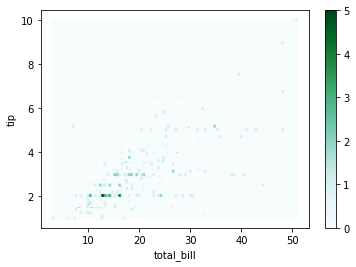

In [41]:
fig,ax=plt.subplots()
ax=tips.plot.hexbin(x='total_bill',y='tip',ax=ax)

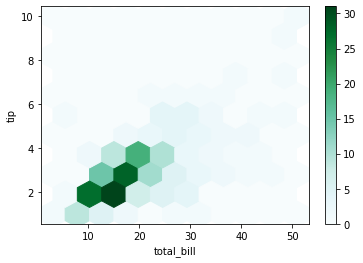

In [42]:
# 육각형 크기는 gridsize 인자를 사용하여 변경 가능
fig,ax = plt.subplots()
ax=tips.plot.hexbin(x='total_bill',y='tip',gridsize=10,ax=ax)

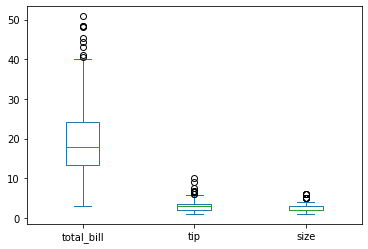

In [43]:
fig,ax=plt.subplots()
ax=tips.plot.box(ax=ax)

## 4-5 seaborn 라이브러리로 그래프 스타일 설정하기

- set_style 메소드를 실행한 이후의 그래프가 모두 지정한 스타일로 바뀜

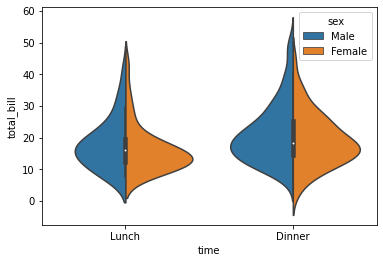

In [44]:
fig,ax=plt.subplots()
ax=sns.violinplot(x='time',y='total_bill',data=tips,hue='sex',split=True)

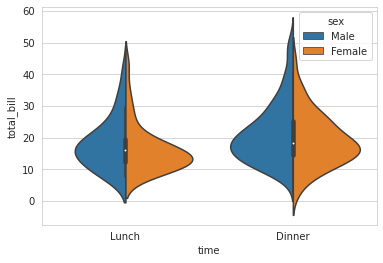

In [46]:
# 스타일을 whitegrid로 설정
sns.set_style('whitegrid')
fig,ax=plt.subplots()
ax=sns.violinplot(x='time',y='total_bill',data=tips,hue='sex',split=True)

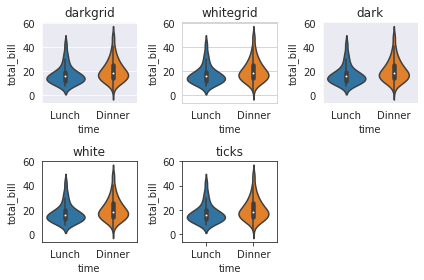

In [51]:
# 모든 스타일 적용
fig = plt.figure() 
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks'] 
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style) 
        
fig.tight_layout()